# Pandas

In [1]:
!ls # magic command

Python basics - day 2.ipynb http.log
Python basics.ipynb         requirements.txt
Untitled.ipynb              venv
Untitled1.ipynb


## Installing packages in jupyter-notebook

In [53]:
!pip install pandas
!pip install matplotlib

You are using pip version 18.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 14.4MB 1.0MB/s ta 0:00:011   37% |████████████                    | 5.4MB 1.8MB/s eta 0:00:05
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
    100% |████████████████████████████████| 122kB 2.1MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/11/fa/0160cd525c62d7abd076a070ff02b2b94de589f1a9789774f17d7c54058e/pyparsing-2.4.2-py2.py3-none-any.whl
You are using pip version 18.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Importing pandas and matplotlib

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

## File we will be working on
[cleaned_access_log](https://python.variantcore.com/cleaned_access_log)

## Downloading using request 

In [31]:
!pip install requests

  Using cached https://files.pythonhosted.org/packages/51/bd/23c926cd341ea6b7dd0b2a00aba99ae0f828be89d72b2190f27c11d4b7fb/requests-2.22.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/bc/a9/01ffebfb562e4274b6487b4bb1ddec7ca55ec7510b22e4c51f14098443b8/chardet-3.0.4-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e6/60/247f23a7121ae632d62811ba7f273d0e58972d75e58a94d329d51550a47d/urllib3-1.25.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/14/2c/cd551d81dbe15200be1cf41cd03869a46fe7226e7450af7a6545bfc474c9/idna-2.8-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/18/b0/8146a4f8dd402f60744fa380bc73ca47303cccf8b9190fd16a827281eac2/certifi-2019.9.11-py2.py3-none-any.whl
You are using pip version 18.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [33]:
import requests

url = 'https://python.variantcore.com/cleaned_access_log'
r = requests.get(url, allow_redirects=True)
open('access_log', 'wb').write(r.content)

2468755

In [34]:
!ls

Python basics - day 2.ipynb http.log
Python basics.ipynb         pandas.ipynb
Untitled.ipynb              requirements.txt
access_log                  venv
apache_logs.txt             xx.log
cleaned_access_log


## Reading text file

In [7]:
data = pd.read_csv('cleaned_access_log')

In [10]:
data.head(5)

ip                          time  \
0  83.149.9.216  [17/May/2015:10:05:03 +0000]   
1  83.149.9.216  [17/May/2015:10:05:43 +0000]   
2  83.149.9.216  [17/May/2015:10:05:47 +0000]   
3  83.149.9.216  [17/May/2015:10:05:12 +0000]   
4  83.149.9.216  [17/May/2015:10:05:07 +0000]   

                                             request status      size  \
0  "GET /presentations/logstash-monitorama-2013/i...    200  203023.0   
1  "GET /presentations/logstash-monitorama-2013/i...    200  171717.0   
2  "GET /presentations/logstash-monitorama-2013/p...    200   26185.0   
3  "GET /presentations/logstash-monitorama-2013/p...    200    7697.0   
4  "GET /presentations/logstash-monitorama-2013/p...    200    2892.0   

                                             referer  \
0  "http://semicomplete.com/presentations/logstas...   
1  "http://semicomplete.com/presentations/logstas...   
2  "http://semicomplete.com/presentations/logstas...   
3  "http://semicomplete.com/presentations/logstas...   
4  "http://semicomplete.com/presentations/logstas...   

                                          user_agent  
0  "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1...  
1  "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1...  
2  "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1...  
3  "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1...  
4  "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1...

## Simple EDA

In [8]:
data.columns

Index(['ip', 'time', 'request', 'status', 'size', 'referer', 'user_agent'], dtype='object')

In [57]:
data['time'].describe()

count                            10000
unique                            4363
top       [19/May/2015:00:05:25 +0000]
freq                                 9
Name: time, dtype: object

## Clean up

In [11]:
from datetime import datetime

In [67]:
datetime.strptime('[20/May/2015:21:05:28 +0000]', '[%d/%b/%Y:%H:%M:%S %z]')

datetime.datetime(2015, 5, 20, 21, 5, 28, tzinfo=datetime.timezone.utc)

In [15]:
data['time'].apply(lambda x: datetime.strptime(x, '[%d/%b/%Y:%H:%M:%S %z]'))

ValueError: time data '(compatible;' does not match format '[%d/%b/%Y:%H:%M:%S %z]'

In [17]:
data['time'][0:8899]

0       [17/May/2015:10:05:03 +0000]
1       [17/May/2015:10:05:43 +0000]
2       [17/May/2015:10:05:47 +0000]
3       [17/May/2015:10:05:12 +0000]
4       [17/May/2015:10:05:07 +0000]
                    ...             
8894    [20/May/2015:12:05:35 +0000]
8895    [20/May/2015:12:05:34 +0000]
8896    [20/May/2015:12:05:26 +0000]
8897    [20/May/2015:12:05:48 +0000]
8898                    (compatible;
Name: time, Length: 8899, dtype: object

In [12]:
data['time'][8899:].apply(lambda x: datetime.strptime(x, '[%d/%b/%Y:%H:%M:%S %z]'))

8899   2015-05-20 12:05:25+00:00
8900   2015-05-20 12:05:59+00:00
8901   2015-05-20 12:05:16+00:00
8902   2015-05-20 12:05:54+00:00
8903   2015-05-20 12:05:39+00:00
                  ...           
9995   2015-05-20 21:05:28+00:00
9996   2015-05-20 21:05:50+00:00
9997   2015-05-20 21:05:00+00:00
9998   2015-05-20 21:05:56+00:00
9999   2015-05-20 21:05:15+00:00
Name: time, Length: 1101, dtype: datetime64[ns, UTC]

In [19]:
data['time'][8898]

'(compatible;'

In [24]:
data.drop([8898], inplace=True)

### Check if deleted

In [33]:
8898 in data.index

True

In [132]:
data['time'][8898]

KeyError: 'time'

In [38]:
data['time'] = data['time'].apply(lambda x: datetime.strptime(x, '[%d/%b/%Y:%H:%M:%S %z]'))

In [136]:
data.index = data.index.tz_localize(None)

In [137]:
data.index

DatetimeIndex(['2015-05-17 10:05:03', '2015-05-17 10:05:43',
               '2015-05-17 10:05:47', '2015-05-17 10:05:12',
               '2015-05-17 10:05:07', '2015-05-17 10:05:34',
               '2015-05-17 10:05:57', '2015-05-17 10:05:50',
               '2015-05-17 10:05:24', '2015-05-17 10:05:50',
               ...
               '2015-05-20 21:05:11', '2015-05-20 21:05:29',
               '2015-05-20 21:05:34', '2015-05-20 21:05:15',
               '2015-05-20 21:05:01', '2015-05-20 21:05:28',
               '2015-05-20 21:05:50', '2015-05-20 21:05:00',
               '2015-05-20 21:05:56', '2015-05-20 21:05:15'],
              dtype='datetime64[ns]', name='time', length=9999, freq=None)

In [39]:
data['time'][0]

Timestamp('2015-05-17 10:05:03+0000', tz='UTC')

In [49]:
data['user_agent'].apply(str.upper)

0       "MOZILLA/5.0 (MACINTOSH; INTEL MAC OS X 10_9_1...
1       "MOZILLA/5.0 (MACINTOSH; INTEL MAC OS X 10_9_1...
2       "MOZILLA/5.0 (MACINTOSH; INTEL MAC OS X 10_9_1...
3       "MOZILLA/5.0 (MACINTOSH; INTEL MAC OS X 10_9_1...
4       "MOZILLA/5.0 (MACINTOSH; INTEL MAC OS X 10_9_1...
                              ...                        
9995            "TINY TINY RSS/1.11 (HTTP://TT-RSS.ORG/)"
9996            "TINY TINY RSS/1.11 (HTTP://TT-RSS.ORG/)"
9997    "MOZILLA/5.0 (COMPATIBLE; GOOGLEBOT/2.1; +HTTP...
9998    "MOZILLA/5.0 (WINDOWS NT 5.1; RV:6.0.2) GECKO/...
9999    "UNIVERSALFEEDPARSER/4.2-PRE-314-SVN +HTTP://F...
Name: user_agent, Length: 9999, dtype: object

## Simple EDA

In [51]:
import re

In [47]:
data['user_agent'][911]

'"Mozilla/5.0 (Windows NT 6.1; WOW64; rv:27.0) Gecko/20100101 Firefox/27.0"'

In [59]:
data['status'] = data.status.astype(int)

In [60]:
data.status

0       200
1       200
2       200
3       200
4       200
       ... 
9995    200
9996    200
9997    200
9998    200
9999    200
Name: status, Length: 9999, dtype: int64

In [55]:
data[data.user_agent.str.contains('Linux', regex= True, na=False, flags=re.IGNORECASE)]

ip                      time  \
23     24.236.252.67 2015-05-17 10:05:40+00:00   
24      93.114.45.13 2015-05-17 10:05:14+00:00   
25      93.114.45.13 2015-05-17 10:05:04+00:00   
26      93.114.45.13 2015-05-17 10:05:45+00:00   
27      93.114.45.13 2015-05-17 10:05:14+00:00   
...              ...                       ...   
9949  91.151.182.109 2015-05-20 21:05:13+00:00   
9950  91.151.182.109 2015-05-20 21:05:50+00:00   
9953    63.140.98.80 2015-05-20 21:05:27+00:00   
9954    63.140.98.80 2015-05-20 21:05:58+00:00   
9955    63.140.98.80 2015-05-20 21:05:11+00:00   

                                                request status     size  \
23                          "GET /favicon.ico HTTP/1.1"    200   3638.0   
24      "GET /articles/dynamic-dns-with-dhcp/ HTTP/1.1"    200  18848.0   
25                            "GET /reset.css HTTP/1.1"    200   1015.0   
26                           "GET /style2.css HTTP/1.1"    200   4877.0   
27                          "GET /favicon.ico HTTP/1.1"    200   3638.0   
...                                                 ...    ...      ...   
9949         "GET /images/web/2009/banner.png HTTP/1.1"    200  52315.0   
9950                        "GET /favicon.ico HTTP/1.1"    200   3638.0   
9953                  "GET /projects/xdotool/ HTTP/1.1"    200  12292.0   
9954               "GET /images/jordan-80.png HTTP/1.1"    200   6146.0   
9955  "GET /files/logstash/logstash-1.3.2-monolithic...    404    324.0   

                                                referer  \
23                                                  "-"   
24    "http://www.google.ro/url?sa=t&rct=j&q=&esrc=s...   
25    "http://www.semicomplete.com/articles/dynamic-...   
26    "http://www.semicomplete.com/articles/dynamic-...   
27                                                  "-"   
...                                                 ...   
9949    "http://www.semicomplete.com/projects/xdotool/"   
9950                                                "-"   
9953  "http://stackoverflow.com/questions/3983946/ge...   
9954    "http://www.semicomplete.com/projects/xdotool/"   
9955                                                "-"   

                                             user_agent  
23    "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:26...  
24    "Mozilla/5.0 (X11; Linux x86_64; rv:25.0) Geck...  
25    "Mozilla/5.0 (X11; Linux x86_64; rv:25.0) Geck...  
26    "Mozilla/5.0 (X11; Linux x86_64; rv:25.0) Geck...  
27    "Mozilla/5.0 (X11; Linux x86_64; rv:25.0) Geck...  
...                                                 ...  
9949  "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/5...  
9950  "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/5...  
9953  "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/5...  
9954  "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/5...  
9955  "Chef Client/10.18.2 (ruby-1.9.3-p327; ohai-6....  

[2314 rows x 7 columns]

In [47]:
data[['ip', 'status', 'user_agent']].describe()

ip status  \
count           10000  10000   
unique           1754      9   
top     66.249.73.135    200   
freq              482   9125   

                                               user_agent  
count                                                9999  
unique                                                558  
top     "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...  
freq                                                 1044

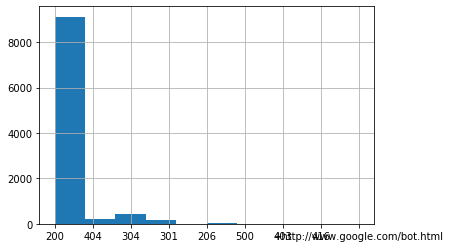

In [56]:
data['status'].hist()

In [66]:
data.set_index('time', inplace=True)

In [75]:
min(data.index)

Timestamp('2015-05-17 10:05:00+0000', tz='UTC')

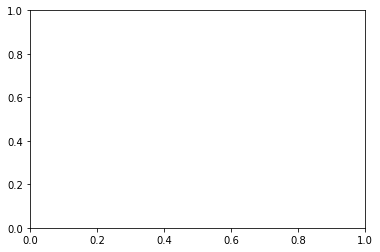

In [103]:
fig, ax = plt.subplots( nrows=1, ncols=1 )

In [107]:
xa = data['size'].resample('H').mean()

In [90]:
from matplotlib import pyplot as plt

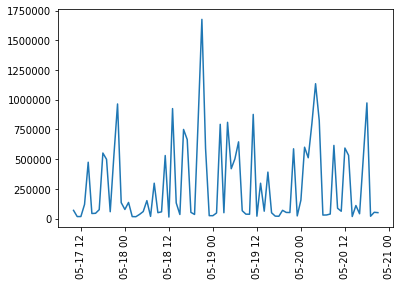

In [110]:
plt.xticks(rotation=90)
plt.plot(xa)
plt.savefig('myfig')

/Users/kamil/code/cisco_python/venv/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


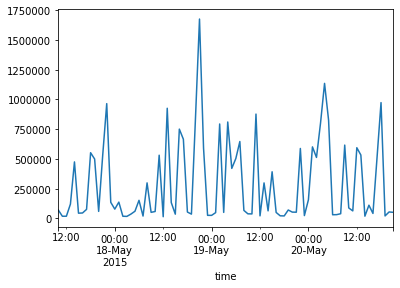

In [114]:
xa = data['size'].resample('H').mean().plot()

/Users/kamil/code/cisco_python/venv/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


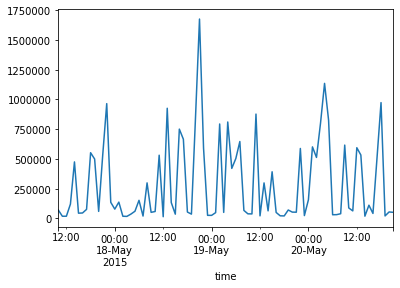

In [112]:
xa.plot()

In [ ]:
data[data.user_agent.str.contains('Linux', regex= True, na=False, flags=re.IGNORECASE)]

In [128]:
data.to_excel?

In [129]:
!pip install openpyxl

    100% |████████████████████████████████| 174kB 1.8MB/s ta 0:00:01
  Running setup.py install for et-xmlfile ... done
  Running setup.py install for openpyxl ... done
You are using pip version 18.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [138]:
data.to_excel('report.xlsx')

In [139]:
!ls

cleaned_access_log myfig.png          report.xlsx
foo.png            pandas.ipynb


## Exercise - report creation

* Report should say about different  web browsers user are using,
